In [1]:
import kaggle 
import pandas as pd
##### Text processing
import re # regular expressions
import spacy
import nltk

In [2]:
!kaggle datasets list -s 'nlp'

ref                                                     title                                                size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------  --------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
samdeeplearning/deepnlp                                 Deep-NLP                                           239413  2017-03-01 05:43:51.957000          11127        223  0.8235294        
sudalairajkumar/tamil-nlp                               Tamil NLP                                         3067205  2019-03-11 06:29:11.220000           3097        135  1.0              
praveengovi/emotions-dataset-for-nlp                    Emotions dataset for NLP                           738340  2020-04-16 06:47:48.530000          50642        325  1.0              
datatattle/covid-19-nlp-text-classification             Coronavir

No se pudo analizar el valor especificado en una clave del Registro de ejecuci�n autom�tica.


# Preprocessing

Regular expressions RegEx
========================
[regex101.com/](regex101.com)

In [3]:

chats = ['My phone is +52 55 12121212', 'Yeah it is 5512323232', 'ok my# is 525512222200']
pattern = '\+\d{2} 55 \d{8}|55\d{8}|5255\d{8}' 
extraction = re.findall(pattern, str(chats[2]))
print(extraction)

['525512222200']


<>:2: SyntaxWarning: invalid escape sequence '\+'
<>:2: SyntaxWarning: invalid escape sequence '\+'
C:\Users\hecma\AppData\Local\Temp\ipykernel_27428\2805759903.py:2: SyntaxWarning: invalid escape sequence '\+'
  pattern = '\+\d{2} 55 \d{8}|55\d{8}|5255\d{8}'


## Word Tokenization
Text processing before ML model

In [4]:
nlp = spacy.load('en_core_web_sm') #load the english model
# this is an example for tokanization, spacy use object oriented programming, so we need to create a doc object
doc = nlp("Cats are intelligent animals. Dogs are very friendly. I love my dog and cat. I'm a Dr. who loves animals.")

# This step will split the text into sentences by using the language model's sentence segmentation capabilities. 
## In this case the sentences are split by a dot (.)
for sentence in doc.sents:
    print(sentence)
    for word in sentence:
        print(word) # this separates the words in the sentence (tokenization)

Cats are intelligent animals.
Cats
are
intelligent
animals
.
Dogs are very friendly.
Dogs
are
very
friendly
.
I love my dog and cat.
I
love
my
dog
and
cat
.
I'm a Dr. who loves animals.
I
'm
a
Dr.
who
loves
animals
.


In [5]:
from nltk.tokenize import PunktSentenceTokenizer, WordPunctTokenizer

# Force download of punkt
#nltk.download('punkt')

text = "I'm a Dr. who loves animals. Do you love them too?"
print(PunktSentenceTokenizer().tokenize(text))
print(WordPunctTokenizer().tokenize(text)) # this will split the text into words and punctuation marks


["I'm a Dr.", 'who loves animals.', 'Do you love them too?']
['I', "'", 'm', 'a', 'Dr', '.', 'who', 'loves', 'animals', '.', 'Do', 'you', 'love', 'them', 'too', '?']


### Tokenization using Spacy
As this is aimed to be a demostrative project, we will use Spacy for tokenization.

In [17]:
nlp = spacy.blank('en') # create a blank english model, with this it is possible to create a custom model or pipeline
doc = nlp("Cats are intelligent animals. Dogs are very friendly. I love my dog and cat. I'm a Dr. who loves animals.")

for token in doc:
    print(token)

Cats
are
intelligent
animals
.
Dogs
are
very
friendly
.
I
love
my
dog
and
cat
.
I
'm
a
Dr.
who
loves
animals
.


In [19]:
# as I am using a blank english model, the pipeline is empty
nlp.pipe_names
# !python -m spacy download en_core_web_sm 
#  # this will download a pre-trained pipeline 
nlp = spacy.load("en_core_web_sm") # I am showing the pipeline that the pretrained model has 
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [15]:
doc = nlp("Cats are intelligent animals. Dogs are very friendly. I love my dog and cat. I'm a Dr. who loves animals.")

for token in doc:
    print(token, "|" , token.pos_, "|", token.lemma_)

Cats | NOUN | cat
are | AUX | be
intelligent | ADJ | intelligent
animals | NOUN | animal
. | PUNCT | .
Dogs | NOUN | dog
are | AUX | be
very | ADV | very
friendly | ADJ | friendly
. | PUNCT | .
I | PRON | I
love | VERB | love
my | PRON | my
dog | NOUN | dog
and | CCONJ | and
cat | NOUN | cat
. | PUNCT | .
I | PRON | I
'm | AUX | be
a | DET | a
Dr. | PROPN | Dr.
who | PRON | who
loves | VERB | love
animals | NOUN | animal
. | PUNCT | .


In [ ]:
doc = nlp("Tesla Inc and Volkswagen fabricated arround 20 million of e-cars in 2022") #to recognize the entieites NER (Name Entity Recognization) is used to recogize the entities 
for ent in doc.ents:
    print(ent.text, "|" , ent.label_, "|", spacy.explain(ent.label_))

Tesla Inc | ORG | Companies, agencies, institutions, etc.
Volkswagen | ORG | Companies, agencies, institutions, etc.
20 million | CARDINAL | Numerals that do not fall under another type
2022 | DATE | Absolute or relative dates or periods


## Stemming and Lemmatization
Stemming and lemmatization are techniques used in natural language processing to reduce words to their base or root form.
Ex. "running" -> "run"
### Stemming
Uses only a fixed rule to remove suffixes and prefixes from words, without considering the context or meaning of the word. It is a simpler and faster process than lemmatization but can produce non-dictionary words.
### Lemmatization
Lemmatization is a more sophisticated process that reduces words to their base or dictionary form, considering the context and meaning of the word. It uses a vocabulary and morphological analysis of words. Uses knowledge of the language and its grammar to produce valid words.

In [21]:
import nltk
import spacy
from nltk.stem import PorterStemmer

In [ ]:
stemmer = PorterStemmer()

words = ["holding", 'holder', 'eat', 'ate', 'eaten', 'eating', 'meeting', 'ability']

for word in words:
    print(word, "\t|\t", stemmer.stem(word))

holding 	|	 hold
holder 	|	 holder
eat 	|	 eat
ate 	|	 ate
eaten 	|	 eaten
eating 	|	 eat
meeting 	|	 meet
ability 	|	 abil


In [30]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(' '.join(words))

for token in doc: 
    print(token,'\t|\t', token.lemma_)

holding 	|	 hold
holder 	|	 holder
eat 	|	 eat
ate 	|	 eat
eaten 	|	 eat
eating 	|	 eat
meeting 	|	 meeting
ability 	|	 ability


### POS (Part of Speech) Tagging
POS tagging is the process of assigning a part of speech (noun, verb, adjective, etc.) to each word in a sentence. It helps in understanding the grammatical structure of the sentence and is useful for various NLP tasks such as named entity recognition, sentiment analysis, and machine translation.

In [9]:
import spacy 
nlp = spacy.load('en_core_web_sm')
doc = nlp("Cats are intelligent animals. Dogs are very friendly I have 2 dogs and 3 cats. I love my dog, cat, etc. I'm a Dr. who loves animals.")

for token in doc:
    print(token.text, "|", token.pos_, "|", spacy.explain(token.pos_) ,
          "|", token.lemma_, '|',token.tag_, "|", spacy.explain(token.tag_))
    

Cats | NOUN | noun | cat | NNS | noun, plural
are | AUX | auxiliary | be | VBP | verb, non-3rd person singular present
intelligent | ADJ | adjective | intelligent | JJ | adjective (English), other noun-modifier (Chinese)
animals | NOUN | noun | animal | NNS | noun, plural
. | PUNCT | punctuation | . | . | punctuation mark, sentence closer
Dogs | NOUN | noun | dog | NNS | noun, plural
are | AUX | auxiliary | be | VBP | verb, non-3rd person singular present
very | ADV | adverb | very | RB | adverb
friendly | ADJ | adjective | friendly | JJ | adjective (English), other noun-modifier (Chinese)
I | PRON | pronoun | I | PRP | pronoun, personal
have | VERB | verb | have | VBP | verb, non-3rd person singular present
2 | NUM | numeral | 2 | CD | cardinal number
dogs | NOUN | noun | dog | NNS | noun, plural
and | CCONJ | coordinating conjunction | and | CC | conjunction, coordinating
3 | NUM | numeral | 3 | CD | cardinal number
cats | NOUN | noun | cat | NNS | noun, plural
. | PUNCT | punctuatio

As seen, the tokenization identidfies the lemma, however, the tag describes how it is used in the sentence. The POS also identifies what position or role the word plays in the sentence, such as whether it is a noun, verb, adjective, etc. This information is crucial for understanding the meaning of the sentence and for tasks like parsing and semantic analysis.

## NER Named Entity Recognition

In [8]:
import spacy

nlp = spacy.load("en_core_web_sm")
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [9]:
doc = nlp("Xbox Inc is working with 343 industries to dvelop a new Halo game")

for ent in doc.ents:
    print(ent.text, "|", ent.label_, "|", spacy.explain(ent.label_))

Xbox Inc | ORG | Companies, agencies, institutions, etc.
343 | CARDINAL | Numerals that do not fall under another type
Halo | ORG | Companies, agencies, institutions, etc.


In [14]:
doc[11:]

Halo game

In [15]:
from spacy.tokens import Span

s1 = Span(doc, 5,7, label="ORG")
s2 = Span(doc, 11, 13, label="NOUN")

doc.set_ents([s1,s2], default="unmodified")

In [16]:
for ent in doc.ents:
    print(ent.text, "|", ent.label_, "|", spacy.explain(ent.label_))

Xbox Inc | ORG | Companies, agencies, institutions, etc.
343 industries | ORG | Companies, agencies, institutions, etc.
Halo game | NOUN | noun


# Feature Engineering
Feature: A feature is an individual measurable property or characteristic of a phenomenon being observed. In machine learning, features are the input variables used to train models. They can be numerical, categorical, or textual data.


Now in order to have features and not only text, we will use the following techniques:
- 1. Label Encoding
- 2. One-Hot Encoding
- 3. Bag of Words (BoW)
- 3. TF-IDF (Term Frequency-Inverse Document Frequency)\
- 4. Word Embeddings (Word2Vec, GloVe, FastText)

### Example using Bag of Words (BoW) - Text classification

For this example I will use the BoW to make the feature extraction. Then I will apply a simple classification model to classify the text into positive or negative sentiment.



In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import kaggle 
import kagglehub
import time

In [83]:
# kaggle.api.authenticate()
# !kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews -p ../data
# import zipfile
# import os

# zip_path = "../data/imdb-dataset-of-50k-movie-reviews.zip"
# extract_dir = "../data/imdb"

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_dir)

In [84]:
# Set the path to the file you'd like to load
file_path = "../data/imdb/IMDB Dataset.csv"

df_imdb = pd.read_csv(file_path)
df_imdb

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [85]:
print(df_imdb.describe())
df_imdb['sentiment_'] = df_imdb.sentiment.apply(lambda x: 1 if x == 'positive' else 0)

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


In [86]:
df_imdb

,review,sentiment,sentiment_
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1
...,...,...,...
49995,I thought this movie did a down right good job...,positive,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,0
49997,I am a Catholic taught in parochial elementary...,negative,0
49998,I'm going to have to disagree with the previou...,negative,0


In [87]:
X = df_imdb.review
y =  df_imdb.sentiment_ 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20, random_state=42)

### Creating a bag of words representation of the text data

In [88]:
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train.values)
X_test_bow = vectorizer.transform(X_test)
X_train_bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 5455841 stored elements and shape (40000, 93003)>

In [89]:
print(X_train_bow.shape)
vectorizer.vocabulary_

(40000, 93003)


{'that': 82276,
 'what': 90223,
 'kept': 45010,
 'asking': 5687,
 'myself': 55549,
 'during': 25421,
 'the': 82298,
 'many': 50725,
 'fights': 30257,
 'screaming': 72310,
 'matches': 51331,
 'swearing': 80430,
 'and': 4094,
 'general': 33523,
 'mayhem': 51591,
 'permeate': 61363,
 '84': 1202,
 'minutes': 53425,
 'comparisons': 17153,
 'also': 3544,
 'stand': 77914,
 'up': 87237,
 'when': 90287,
 'you': 92267,
 'think': 82525,
 'of': 58067,
 'one': 58407,
 'dimensional': 22932,
 'characters': 14592,
 'who': 90487,
 'have': 37326,
 'so': 76183,
 'little': 48457,
 'depth': 22019,
 'it': 42829,
 'is': 42704,
 'virtually': 88691,
 'impossible': 40723,
 'to': 83250,
 'care': 13361,
 'happens': 36905,
 'them': 82355,
 'they': 82468,
 'are': 5151,
 'just': 44258,
 'badly': 6909,
 'written': 91642,
 'cyphers': 20187,
 'for': 31436,
 'director': 23090,
 'hang': 36819,
 'his': 38516,
 'multicultural': 55158,
 'beliefs': 8404,
 'on': 58386,
 'topic': 83562,
 'has': 37171,
 'been': 8196,
 'done': 2

#### ML models
This is a simple approach, in this case I am skipping the preprocessing steps, therefore some stop words, punctuation, and other noise will be included in the features. However, this is a good starting point to understand how to create features from text data.



##### Naïve Bayes Classifier


In [ ]:

nb_clf = Pipeline([
    ('Bagowords',vectorizer),
    ('NB_Class',MultinomialNB())        
    ])
start = time.time()
nb_clf.fit(X_train,y_train)
end = time.time()
y_pred = nb_clf.predict(X_test)

print(classification_report(y_test,y_pred))
print(f"Naïve Bayes: {end-start}s")

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      4961
           1       0.87      0.82      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Naïve Bayes: 4.502702951431274s


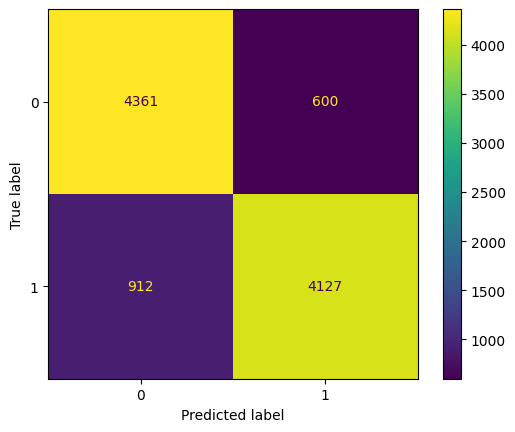

In [96]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=nb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=nb_clf.classes_)
disp.plot()

plt.show()

### Random Forest Classifier

In [92]:
model_rf = RandomForestClassifier(
    max_depth=6,
    bootstrap= True)


clf_rf = Pipeline(
    [('vectorizer', CountVectorizer()),
    ('Random_forest',model_rf)])
start =  time.time()
clf_rf.fit(X_train,y_train)
end = time.time()

y_pred_rf = clf_rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))
print(f"Random Forest: {end-start}s")

              precision    recall  f1-score   support

           0       0.83      0.78      0.81      4961
           1       0.80      0.85      0.82      5039

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000

Random Forest: 5.421456813812256s


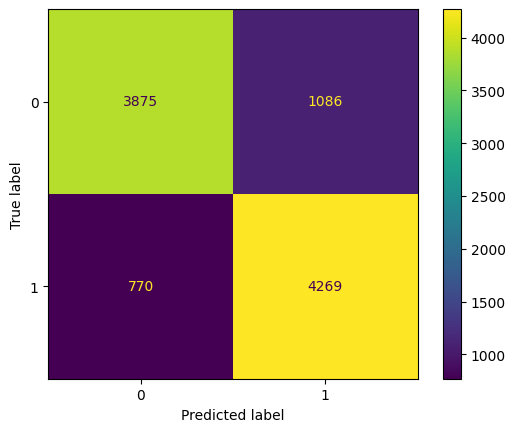

In [93]:
cm = confusion_matrix(y_test, y_pred_rf, labels=clf_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_rf.classes_)
disp.plot()

plt.show()

### KNN Classifier

In [94]:
clf_knn = Pipeline(
    [('vectorizer', CountVectorizer()),
    ('knn',KNeighborsClassifier())])

start =  time.time()
clf_knn.fit(X_train,y_train)
end =  time.time()
y_pred_knn = clf_knn.predict(X_test)
print(classification_report(y_test,y_pred_knn))
print(f"KNN Classifier: {end-start}s")

              precision    recall  f1-score   support

           0       0.66      0.57      0.61      4961
           1       0.63      0.72      0.67      5039

    accuracy                           0.64     10000
   macro avg       0.65      0.64      0.64     10000
weighted avg       0.65      0.64      0.64     10000

KNN Classifier: 4.381031513214111s


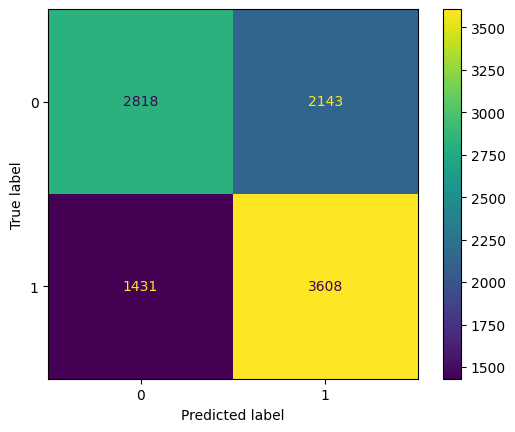

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn, labels=clf_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_knn.classes_)
disp.plot()
plt.show()